In [12]:
### Imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set seaborn color palette
colors = sns.color_palette("pastel")

%matplotlib inline




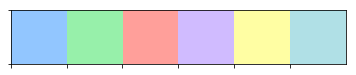

In [2]:
# Visualize available colors
sns.palplot(colors)

## Auxilary datasets

In [3]:
# Peeking into dataframes
df_aisles = pd.read_csv("../data/aisles.csv")
print('Total aisles: {}'.format(df_aisles.shape[0]))
df_aisles.head()

Total aisles: 134


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
# Peeking into dataframes
df_departments = pd.read_csv("../data/departments.csv")
print('Total departments: {}'.format(df_departments.shape[0]))
df_departments.head()

Total departments: 21


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
# Peeking into dataframes
df_products = pd.read_csv("../data/products.csv")
print('Total products: {}'.format(df_products.shape[0]))
df_products.head()

Total products: 49688


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


## Order datasets

In [6]:
df_order_products_prior = pd.read_csv("../data/order_products__prior.csv")
print('Total ordered products (prior): {}'.format(df_order_products_prior.shape[0]))
df_order_products_prior.head()

Total ordered products (prior): 32434489


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
df_order_products_train = pd.read_csv("../data/order_products__train.csv")
print('Total ordered products (train): {}'.format(df_order_products_train.shape[0]))
df_order_products_train.head()

Total ordered products (train): 1384617


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [8]:
df_order_products_test = pd.read_csv('../data/sample_submission.csv')
print('Orders(test): {}'.format(df_order_products_test.shape[0]))
df_order_products_test.head()

Orders(test): 75000


,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


In [9]:
df_orders = pd.read_csv("../data/orders.csv")
print('Total orders: {}'.format(df_orders.shape[0]))
df_orders.head()

Total orders: 3421083


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


## General Statistics

In [10]:
# User split into train and test
df_orders.groupby("eval_set").nunique().user_id.reset_index()

,eval_set,user_id
0,prior,206209
1,test,75000
2,train,131209


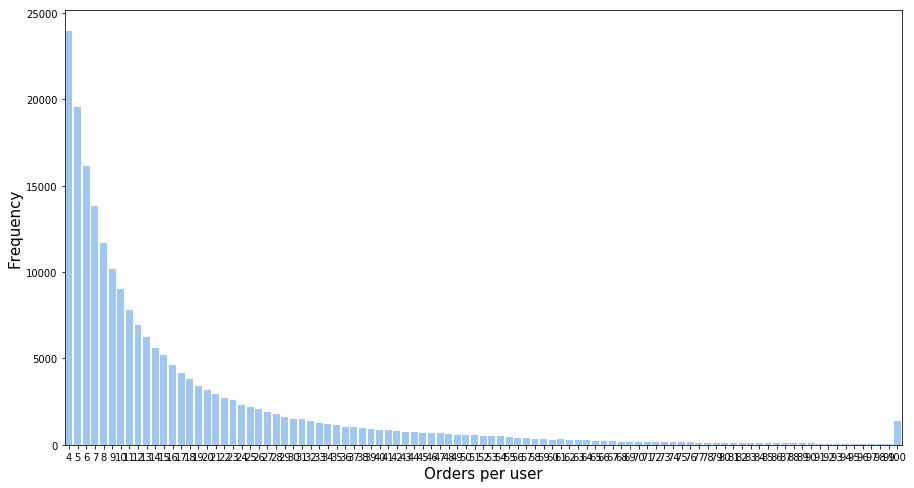

In [13]:
user_order_count = df_orders.groupby("user_id")["order_number"].aggregate(max).reset_index().order_number.value_counts()

plt.figure(figsize=(15,8))
sns.barplot(user_order_count.index, user_order_count.values, color=colors[0])
plt.ylabel("Frequency", fontsize=15)
# Add title
plt.xlabel("Orders per user", fontsize=15)
plt.show()

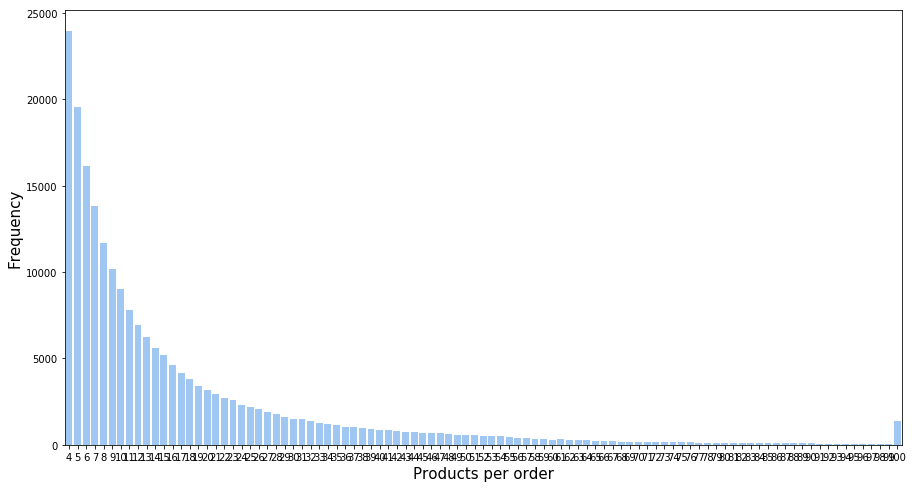

In [15]:
# Train set
order_product_count = df_order_products_train.groupby("order_id")["add_to_cart_order"].aggregate(max).reset_index().add_to_cart_order.value_counts()

plt.figure(figsize=(15,8))
sns.barplot(user_order_count.index, user_order_count.values, color=colors[0])
plt.ylabel('Frequency', fontsize=15)
# Add title
plt.xlabel('Products per order', fontsize=15)
plt.show()

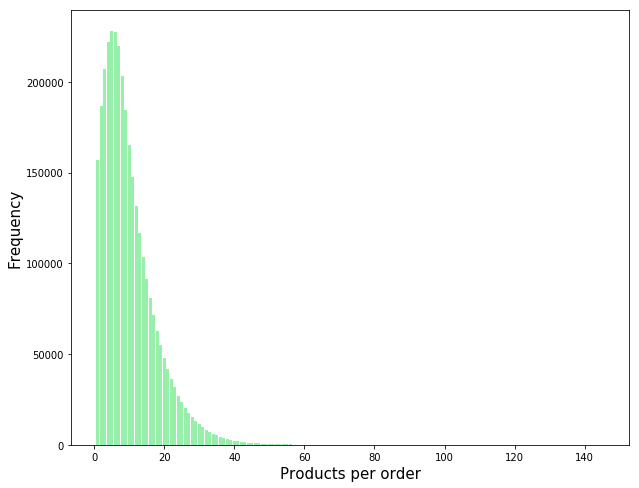

In [16]:
# Prior set
order_product_count = df_order_products_prior.groupby("order_id")["add_to_cart_order"].aggregate(max).reset_index().add_to_cart_order.value_counts()

plt.figure(figsize=(10,8))
plt.bar(order_product_count.index, order_product_count.values, color=colors[1])
plt.ylabel('Frequency', fontsize=15)
# Add title
plt.xlabel('Products per order', fontsize=15)
plt.show()

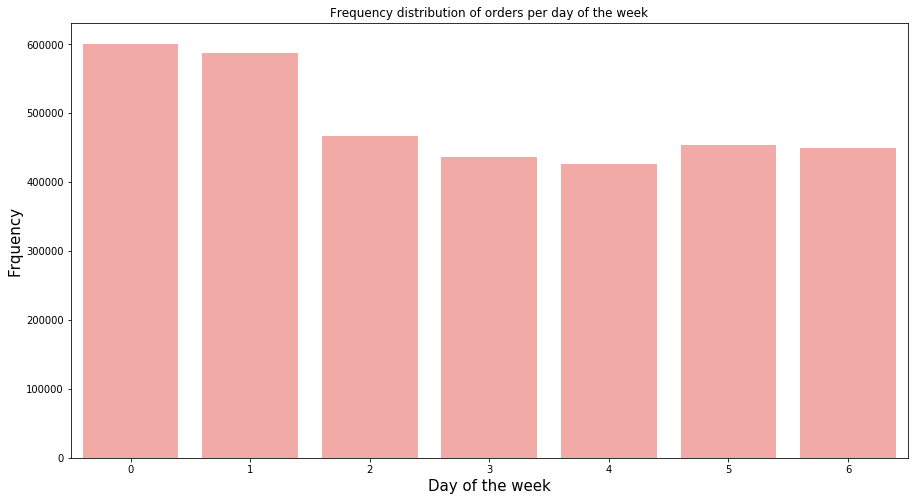

In [17]:
plt.figure(figsize=(15,8))
sns.countplot(x="order_dow", data=df_orders, color=colors[2])
plt.ylabel("Frquency", fontsize=15)
plt.xlabel("Day of the week", fontsize=15)
plt.title("Frequency distribution of orders per day of the week")
plt.show()

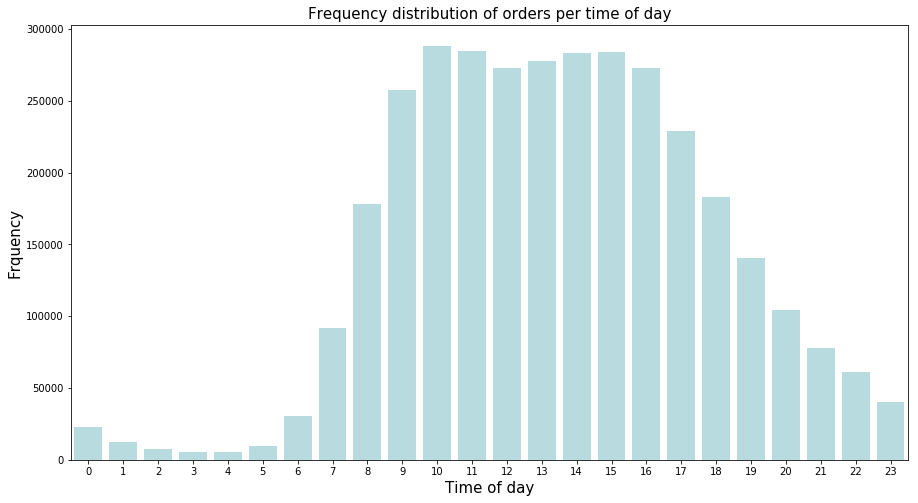

In [18]:
plt.figure(figsize=(15,8))
sns.countplot(x="order_hour_of_day", data=df_orders, color=colors[5])
plt.ylabel("Frquency", fontsize=15)
plt.xlabel("Time of day", fontsize=15)
plt.title("Frequency distribution of orders per time of day", fontsize=15)
plt.show()

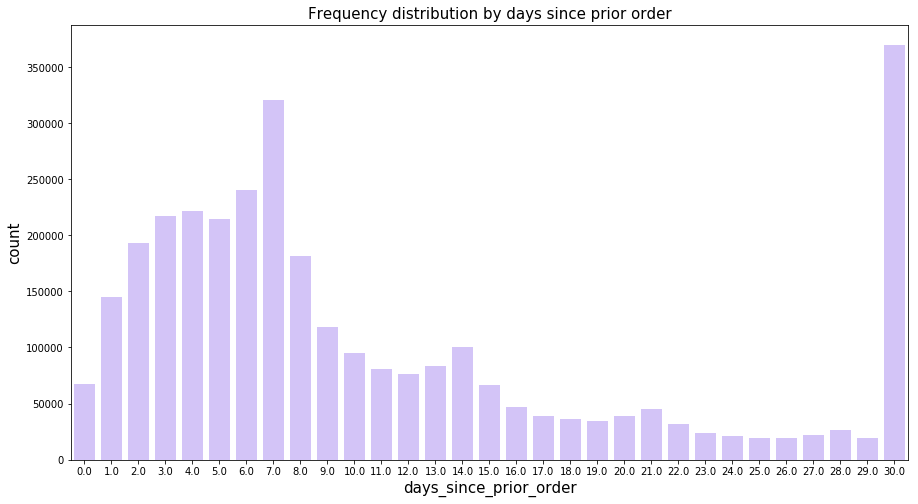

In [20]:
plt.figure(figsize=(15,8))
plt.ylabel("Frequency", fontsize=15)
plt.xlabel('Days since prior order', fontsize=15)
plt.title("Frequency distribution by days since prior order", fontsize=15)
sns.countplot(x="days_since_prior_order", data=df_orders, color=colors[3])
plt.show()

In [21]:
# Merge Prior orders, Product, Aisle and Department 
df_order_products_prior_merged = pd.merge(
                                    pd.merge(pd.merge(df_order_products_prior, df_products, on="product_id", how="left"), 
                                        df_aisles, 
                                        on="aisle_id", 
                                        how="left"), 
                                    df_departments, 
                                    on="department_id", 
                                    how="left")

In [22]:
df_order_products_prior_merged.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [23]:
# N = Top X

N = 20

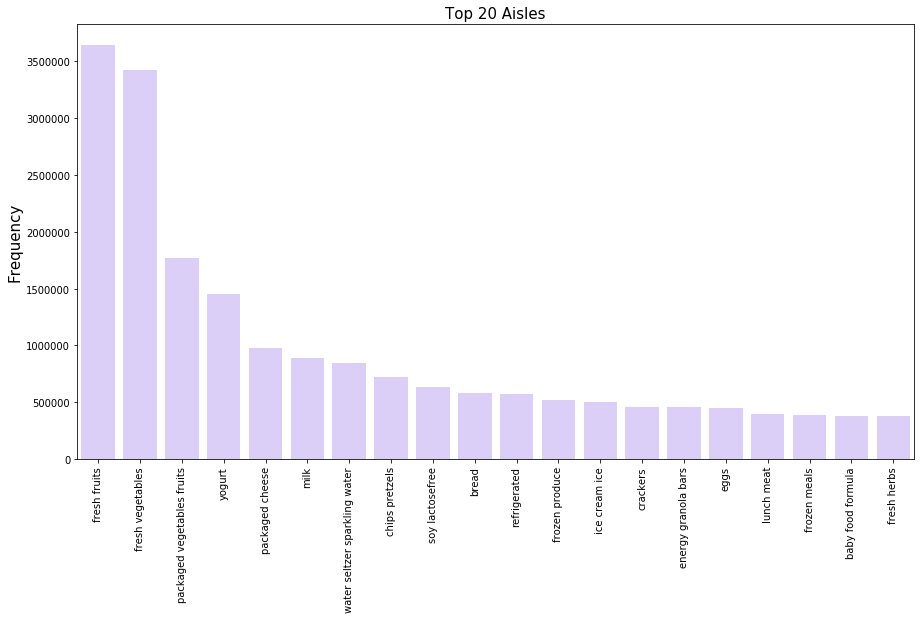

In [24]:
# Top N Aisles
top_aisles = df_order_products_prior_merged["aisle"].value_counts().head(N)

plt.figure(figsize=(15,8))
sns.barplot(top_aisles.index, top_aisles.values, alpha=0.8, color=colors[3])
plt.ylabel('Frequency', fontsize=15)
plt.xticks(rotation="vertical")
plt.title('Top {} Aisles'.format(N), fontsize=15)
plt.show()

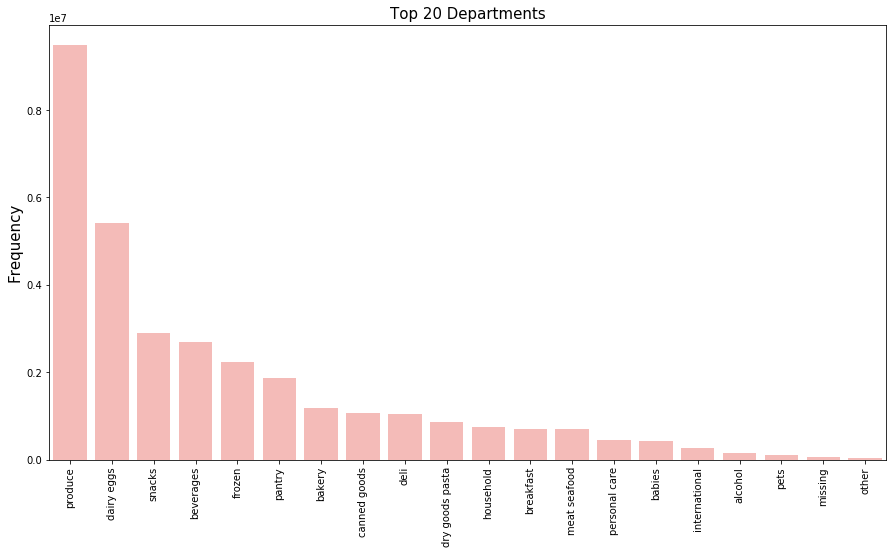

In [25]:
# Top N Departments
top_departments = df_order_products_prior_merged["department"].value_counts().head(N)

plt.figure(figsize=(15,8))
sns.barplot(top_departments.index, top_departments.values, alpha=0.8, color=colors[2])
plt.ylabel('Frequency', fontsize=15)
plt.xticks(rotation="vertical")
plt.title('Top {} Departments'.format(N), fontsize=15)
plt.show()

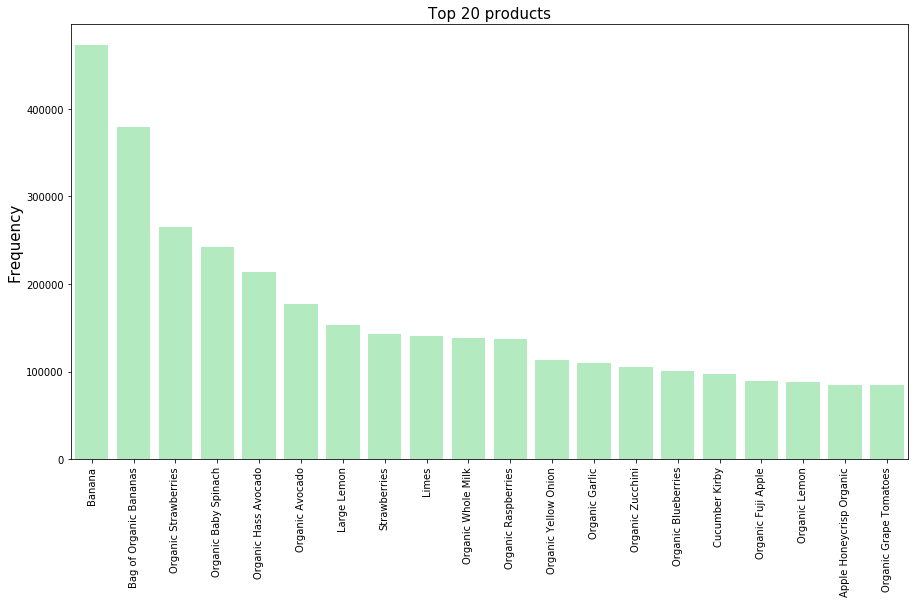

In [26]:
# Top N products by frequency
top_products = df_order_products_prior_merged["product_name"].value_counts().head(N)

plt.figure(figsize=(15,8))
sns.barplot(top_products.index, top_products.values, alpha=0.8, color=colors[1])
plt.ylabel('Frequency', fontsize=15)
plt.xticks(rotation="vertical")
plt.title('Top {} products'.format(N), fontsize=15)
plt.show()